# **Importing necessary libraries**

In [70]:
import os
import nltk
import re, string
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import plotly.express as px
import matplotlib.pyplot as plt

import tensorflow as tf
#import ktrain
#from ktrain import text
# import tensorflow_hub as hub
# import tensorflow_text as text

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

# from transformers import BertTokenizer, TFBertForSequenceClassification
# from transformers import InputExample, InputFeatures
from textblob import TextBlob

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from datetime import datetime as dtime
import collections
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nl

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df = pd.read_csv('/content/drive/MyDrive/Assignment/Amajonnew.csv', sep = ';')

## **Data analysis**

In [73]:
df.head()

,path,id,parent_id,level,object_id,object_type,object_key,query_status,query_time,query_type,message,created_time,like_count,comment_count,error.message
0,9465008123_10160119087948124,2,1,1,9465008123_10160119087948124,data,data.*,fetched (200),2023-03-03 09:30:46.428048,Facebook:/<page-id>/posts,Looking to elevate your space with all things ...,2023-03-02T17:00:03+0000,NaN,NaN,NaN
1,9465008123_10160119087948124/9465008123_101601...,422,2,2,9465008123_10160119087948124,data,data.*,fetched (200),2023-03-03 09:33:31.389383,Facebook:/<post-id>/comments,Jesus preached about one god New Testament Bi...,2023-03-02T17:04:10+0000,0.0,0.0,NaN
2,9465008123_10160119087948124/9465008123_101601...,423,2,2,9465008123_10160119087948124,data,data.*,fetched (200),2023-03-03 09:33:31.389383,Facebook:/<post-id>/comments,Amazon why are you still selling Cosori air fr...,2023-03-02T17:14:41+0000,6.0,10.0,NaN
3,9465008123_10160119087948124/9465008123_101601...,424,2,2,9465008123_10160119087948124,data,data.*,fetched (200),2023-03-03 09:33:31.389383,Facebook:/<post-id>/comments,martha stewart proved what kind of person she ...,2023-03-02T17:22:10+0000,4.0,10.0,NaN
4,9465008123_10160119087948124/9465008123_101601...,425,2,2,9465008123_10160119087948124,data,data.*,fetched (200),2023-03-03 09:33:31.389383,Facebook:/<post-id>/comments,Can not abide her 😡,2023-03-02T17:25:22+0000,3.0,9.0,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26133 entries, 0 to 26132
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   path           26133 non-null  object 
 1   id             26133 non-null  int64  
 2   parent_id      26133 non-null  int64  
 3   level          26133 non-null  int64  
 4   object_id      26133 non-null  object 
 5   object_type    26133 non-null  object 
 6   object_key     25084 non-null  object 
 7   query_status   26133 non-null  object 
 8   query_time     26133 non-null  object 
 9   query_type     26133 non-null  object 
 10  message        24410 non-null  object 
 11  created_time   25084 non-null  object 
 12  like_count     24084 non-null  float64
 13  comment_count  24084 non-null  float64
 14  error.message  0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 3.0+ MB


In [75]:
df.describe()

,id,parent_id,level,like_count,comment_count,error.message
count,26133.000000,26133.000000,26133.000000,24084.000000,24084.000000,0.0
mean,13082.039873,35.653427,1.959859,0.984263,1.481731,NaN
std,7548.174063,34.984948,0.196293,4.130491,5.190435,NaN
min,2.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,6551.000000,8.000000,2.000000,0.000000,0.000000,NaN
50%,13085.000000,17.000000,2.000000,0.000000,0.000000,NaN
75%,19618.000000,62.000000,2.000000,1.000000,0.000000,NaN
max,26151.000000,117.000000,2.000000,261.000000,196.000000,NaN


In [76]:
df.dtypes

path              object
id                 int64
parent_id          int64
level              int64
object_id         object
object_type       object
object_key        object
query_status      object
query_time        object
query_type        object
message           object
created_time      object
like_count       float64
comment_count    float64
error.message    float64
dtype: object

In [77]:
#Checking the missing values
df.isnull().sum()

path                 0
id                   0
parent_id            0
level                0
object_id            0
object_type          0
object_key        1049
query_status         0
query_time           0
query_type           0
message           1723
created_time      1049
like_count        2049
comment_count     2049
error.message    26133
dtype: int64

<AxesSubplot:>

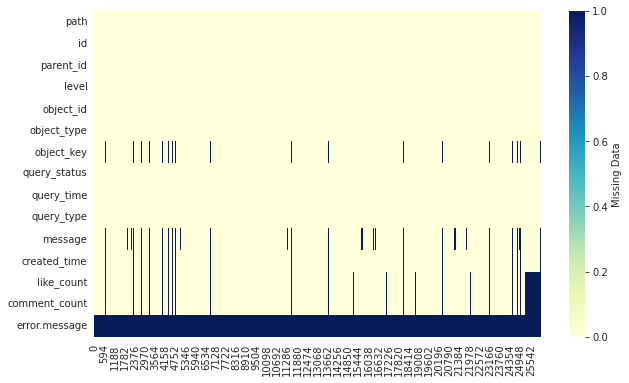

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [79]:
df.columns

Index(['path', 'id', 'parent_id', 'level', 'object_id', 'object_type',
       'object_key', 'query_status', 'query_time', 'query_type', 'message',
       'created_time', 'like_count', 'comment_count', 'error.message'],
      dtype='object')

In [80]:
#takinhg onle necessary columns
df = df[[ 'message', 'like_count', 'comment_count']]

In [81]:
df.head()

,message,like_count,comment_count
0,Looking to elevate your space with all things ...,NaN,NaN
1,Jesus preached about one god New Testament Bi...,0.0,0.0
2,Amazon why are you still selling Cosori air fr...,6.0,10.0
3,martha stewart proved what kind of person she ...,4.0,10.0
4,Can not abide her 😡,3.0,9.0


In [82]:
df.shape

(26133, 3)

In [83]:
#Checking the duplicate value
duplicate = df[df.duplicated()]

In [84]:
duplicate.head(5)

,message,like_count,comment_count
43,"Mimi Please can you send me a friend request, ...",0.0,0.0
52,NaN,NaN,NaN
78,NaN,NaN,NaN
104,NaN,NaN,NaN
108,NaN,NaN,NaN


In [85]:
# removing duplicate value
df.drop_duplicates( subset=None, keep="first", inplace=True)

In [86]:
# Shape after removing  the duplicate
df.shape

(17152, 3)

In [87]:
np.round(df.isnull().sum()/(df.shape[0]),2)

message          0.00
like_count       0.02
comment_count    0.02
dtype: float64

In [88]:
#Droping the nan value
df = df.dropna()

Text(0.5, 1.0, 'Distribution of likes')

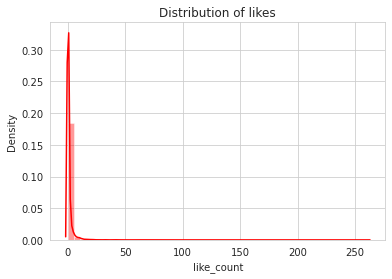

In [89]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['like_count'], kde = True, color ='red')
plt.title("Distribution of likes")

Text(0.5, 1.0, 'Distribution of comments')

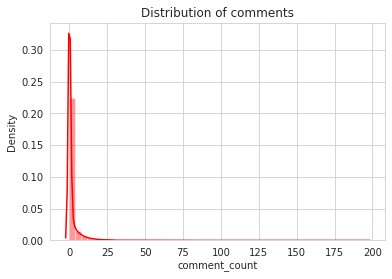

In [90]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['comment_count'], kde = True, color ='red')
plt.title("Distribution of comments")

In [91]:
# function for counting words per test
def word_count(review):
    review_list = review.split()
    return len(review_list)

df['Total_words'] = df['message'].apply(word_count)
df.head(10)

,message,like_count,comment_count,Total_words
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151
3,martha stewart proved what kind of person she ...,4.0,10.0,19
4,Can not abide her 😡,3.0,9.0,5
5,Make every effort to change things you do not ...,0.0,0.0,29
6,Colleen Kiely We always want to help you be ab...,0.0,0.0,29
7,Merc Weinmann We always want to help you be ab...,0.0,0.0,29
8,"Linda Thompson Ive always liked her, what is i...",0.0,0.0,15
9,Hazel Heart me neither I guess. I mean there w...,3.0,0.0,50
10,👐 Love should never hurt cause we all get into...,0.0,0.0,136


Text(0.5, 1.0, 'Distribution of Total_words')

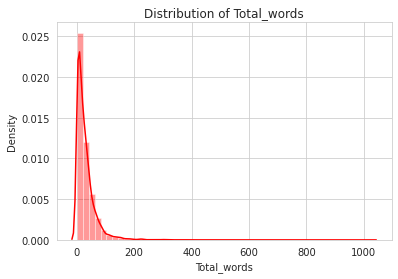

In [92]:
sns.set_style('whitegrid')
sns.distplot(df['Total_words'], kde = True, color ='red')
plt.title("Distribution of Total_words")

## **Text-preprocessing and analysis**

In [93]:
def find_the (text):
    while len(re.findall('##' , text)) != 0:
        text = re.sub('##' , '#' ,text)
    while len(re.findall('@@' , text)) != 0:
        text = re.sub('@@' , '@' ,text)

    no_h = len(re.findall('#',text))
    #make sure the @ is changed for at
    no_a = len(re.findall('@',text))
    
    text = re.sub('@(\s|\.|\?|,|;|:|!|\(|\))', 'at' , text)
    text = re.sub('\s' , ' ' , text)
    text = re.sub('\S@' , ' @' , text)
    text = re.sub('\S#' , ' #' , text)

    #while len(re.findall('\s\s' , text)) != 0:
    #    text = re.sub('\s\s' , '\s' ,text)

    #none_repeat = text
    text_a = text.split()

            
    return text

In [94]:
df['nr_message'] = df.message.apply(lambda d: find_the(d))
df.head()

,message,like_count,comment_count,Total_words,nr_message
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...


In [95]:
# fuction to get the ats and hashes out 

def hash_and_ats (text):
    text_a = text.split()
    hash_list = []
    at_list = []
    
    for a in text_a:
        
        if a.startswith('#'):
            a = a.lower()
            hash_list.append(a)
        elif a.startswith('@'):
            at_list.append(a)

    return [hash_list , at_list]

In [96]:
# getting the hashtag and ats columns
#
df['hashtags'] = df['nr_message'].apply(lambda f : hash_and_ats(f)[0])
df['ats'] = df['nr_message'].apply(lambda f : hash_and_ats(f)[1])


In [97]:
df.head()

,message,like_count,comment_count,Total_words,nr_message,hashtags,ats
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...,[],[]
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...,[],[]
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...,[],[]
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡,[],[]
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...,[],[]


In [98]:
#function for removing url
def removing_url(text):
#replace URL of a text
    cltext = re.sub('http\S+|www\S+','',text)
    return cltext

In [99]:
 removing_url("ðŸ‘ Love should never hurt cause we all get into it with happiness and pure mind, my relationship happened to take a sad turn as my fiancÃ© resulted to domestic violence and womanizing, when he lost his job due to covid and this broke me down so I decided to look for a way to restore my once happy relationship back and I came across Dr pade on Facebook who help me to bring back my man and now he's all good and doing well now, Dr pade is also specialized on the following problems like:.. 1. ðŸ’Love Spell & marriage spell 2. Fertility treatments & ðŸ‹ï¸â€â™€ï¸ loss weight 3. ðŸ‘©â€âš–ï¸ Court cases & Divorce Caseâ€™s 4. â˜˜ï¸ Herbs for disease Cure 5.ðŸ¤°Pregnancy spell 6. ðŸ’¥Protection spell, Contact Dr pade on his Facebook page:.. ðŸ‘‡ https://www.facebook.com/DR-PADE-OKaka1-164268127622349/")

"ðŸ‘\x90 Love should never hurt cause we all get into it with happiness and pure mind, my relationship happened to take a sad turn as my fiancÃ© resulted to domestic violence and womanizing, when he lost his job due to covid and this broke me down so I decided to look for a way to restore my once happy relationship back and I came across Dr pade on Facebook who help me to bring back my man and now he's all good and doing well now, Dr pade is also specialized on the following problems like:.. 1. ðŸ’\x8dLove Spell & marriage spell 2. Fertility treatments & ðŸ\x8f‹ï¸\x8fâ€\x8dâ™€ï¸\x8f loss weight 3. ðŸ‘©â€\x8dâš–ï¸\x8f Court cases & Divorce Caseâ€™s 4. â˜˜ï¸\x8f Herbs for disease Cure 5.ðŸ¤°Pregnancy spell 6. ðŸ’¥Protection spell, Contact Dr pade on his Facebook page:.. ðŸ‘‡ "

In [100]:
df['clean_message'] = df['nr_message'].apply(removing_url)

In [101]:
df.head()

,message,like_count,comment_count,Total_words,nr_message,hashtags,ats,clean_message
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...,[],[],Jesus preached about one god New Testament Bi...
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...,[],[],Amazon why are you still selling Cosori air fr...
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...,[],[],martha stewart proved what kind of person she ...
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡,[],[],Can not abide her 😡
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...,[],[],Make every effort to change things you do not ...


In [102]:
#function for removing stopwords
def removing_stop(text):
  text = text.split()
  text = [word for word in text if not word in stopwords.words('english')]

  return ' '.join(text)

In [103]:
df['stopwordsless_message'] = df['clean_message'].apply(removing_stop)

In [104]:
df.head()

,message,like_count,comment_count,Total_words,nr_message,hashtags,ats,clean_message,stopwordsless_message
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...,[],[],Jesus preached about one god New Testament Bi...,"Jesus preached one god New Testament Bible, wr..."
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...,[],[],Amazon why are you still selling Cosori air fr...,Amazon still selling Cosori air fryers? They r...
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...,[],[],martha stewart proved what kind of person she ...,martha stewart proved kind person is. I want n...
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡,[],[],Can not abide her 😡,Can abide 😡
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...,[],[],Make every effort to change things you do not ...,Make every effort change things like. If canno...


In [105]:
ps = PorterStemmer()
corpus = []
def text_processing(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    return review


In [106]:
df['final_message'] = df['stopwordsless_message'].apply(text_processing)

In [107]:
df.head()

,message,like_count,comment_count,Total_words,nr_message,hashtags,ats,clean_message,stopwordsless_message,final_message
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...,[],[],Jesus preached about one god New Testament Bi...,"Jesus preached one god New Testament Bible, wr...",jesu preach one god new testament bibl written...
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...,[],[],Amazon why are you still selling Cosori air fr...,Amazon still selling Cosori air fryers? They r...,amazon still sell cosori air fryer they recal ...
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...,[],[],martha stewart proved what kind of person she ...,martha stewart proved kind person is. I want n...,martha stewart prove kind person is i want not...
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡,[],[],Can not abide her 😡,Can abide 😡,can abid
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...,[],[],Make every effort to change things you do not ...,Make every effort change things like. If canno...,make everi effort chang thing like if cannot m...


In [108]:
# Polarity
# Function to get polarity(sentiments) of text using the module textblob
def get_polarity(text):
    try:
        textblob = TextBlob(text)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [109]:
# Labelling sentiments to either Positive or Negative
#
def positive_negative(f):
	if f < 0:
		return 'Negative'
	elif f >= 0:
		return 'Positive'

In [110]:
# Sentiment classification problem can be solved in both supervised and unsupervised ways.
# As dataset does not contain any label let's create a label columns based on the polarity to classify a sentense as positive of negetive.
df['polarity'] = df['message'].apply(get_polarity)
df['label'] = df['polarity'].apply(positive_negative)
df.head()

,message,like_count,comment_count,Total_words,nr_message,hashtags,ats,clean_message,stopwordsless_message,final_message,polarity,label
1,Jesus preached about one god New Testament Bi...,0.0,0.0,107,Jesus preached about one god New Testament Bi...,[],[],Jesus preached about one god New Testament Bi...,"Jesus preached one god New Testament Bible, wr...",jesu preach one god new testament bibl written...,0.205195,Positive
2,Amazon why are you still selling Cosori air fr...,6.0,10.0,151,Amazon why are you still selling Cosori air fr...,[],[],Amazon why are you still selling Cosori air fr...,Amazon still selling Cosori air fryers? They r...,amazon still sell cosori air fryer they recal ...,0.098115,Positive
3,martha stewart proved what kind of person she ...,4.0,10.0,19,martha stewart proved what kind of person she ...,[],[],martha stewart proved what kind of person she ...,martha stewart proved kind person is. I want n...,martha stewart prove kind person is i want not...,0.600000,Positive
4,Can not abide her 😡,3.0,9.0,5,Can not abide her 😡,[],[],Can not abide her 😡,Can abide 😡,can abid,0.000000,Positive
5,Make every effort to change things you do not ...,0.0,0.0,29,Make every effort to change things you do not ...,[],[],Make every effort to change things you do not ...,Make every effort change things like. If canno...,make everi effort chang thing like if cannot m...,0.136364,Positive


In [111]:
df['label'].value_counts()

Positive    13440
Negative     3281
Name: label, dtype: int64

In [112]:
# Seperating the dataset based on the label columns to do some analysis
df_positive = df[df['label'] == 'Positive']
df_Negative = df[df['label'] == 'Negative']

In [113]:
pos_word = df_positive.stopwordsless_message.str.split(expand=True).stack().value_counts()
pos = pd.DataFrame(pos_word[:10], columns = ['Frequency'])
pos.reset_index(inplace=True)
pos = pos.rename(columns = {'index':'Word'})

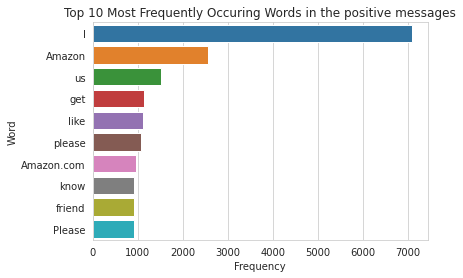

In [114]:
sns.barplot(x='Frequency', y='Word', data = pos)
plt.title('Top 10 Most Frequently Occuring Words in the positive messages')
plt.show()

In [115]:
neg_word = df_Negative.stopwordsless_message.str.split(expand=True).stack().value_counts()
neg = pd.DataFrame(neg_word[:10], columns = ['Frequency'])
neg.reset_index(inplace=True)
neg = neg.rename(columns = {'index':'Word'})

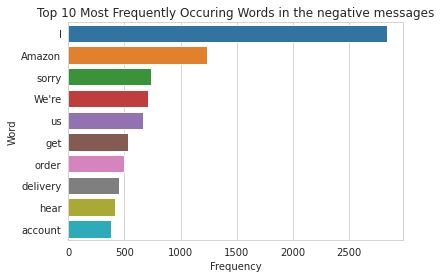

In [116]:
sns.barplot(x='Frequency', y='Word', data = neg)
plt.title('Top 10 Most Frequently Occuring Words in the negative messages')
plt.show()

In [117]:
#
positive = df['nr_message'].apply(lambda f : ' '.join(f))
#neutral = df['nr_message'].apply(lambda f : ' '.join(f))
negative = df['nr_message'].apply(lambda f : ' '.join(f))

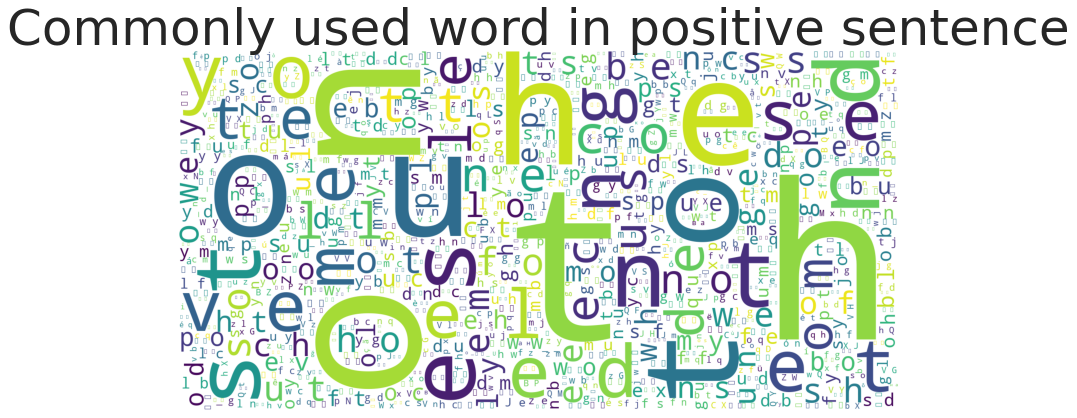

In [118]:
plt.figure(figsize=(10,10))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="#ffffff").generate(" ".join(positive))
plt.imshow(wc2)
plt.axis('off')
plt.title('Commonly used word in positive sentence', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

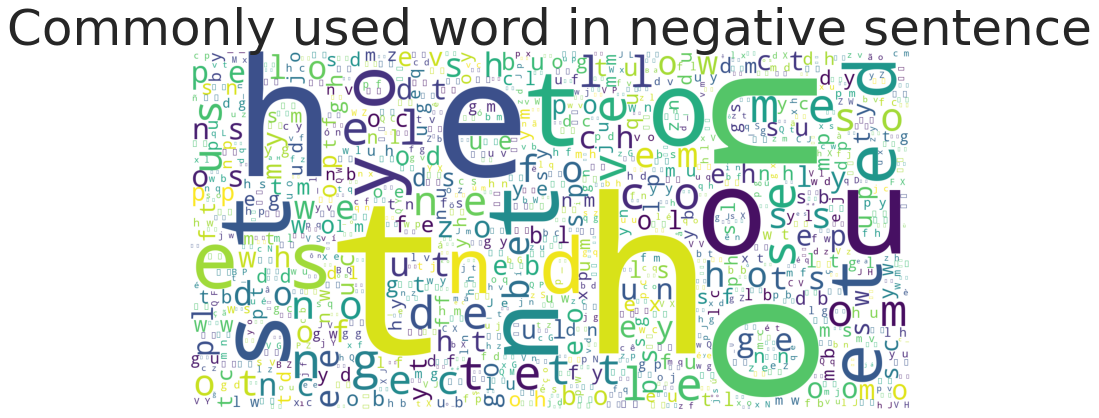

In [119]:
plt.figure(figsize=(10,10))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="#ffffff").generate(" ".join(negative))
plt.imshow(wc2)
plt.axis('off')
plt.title('Commonly used word in negative sentence', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [120]:
# plt.figure(figsize=(20,20))
# wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
#         background_color="#ffffff").generate(" ".join(neutral))
# plt.imshow(wc2)
# plt.axis('off')
# plt.title('Commonly used word in neutral sentence', fontsize=50)
# plt.tight_layout(pad=0)
# plt.show()

In [121]:
# function definition for different types of n-gram analysis

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

## **Unigram analysis**

In [122]:
most_common_uni = get_top_text_ngrams(df.stopwordsless_message,10,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Uni-gram Words in Text ', orientation='h', 
             width=700, height=500,color='Common_words')
fig.show()

## **Bigram analysis**

In [123]:
most_common_bi = get_top_text_ngrams(df.stopwordsless_message,10,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=500,color='Common_words')
fig.show()

## **Tri-gram analysis**

In [124]:
most_common_tri = get_top_text_ngrams(df.stopwordsless_message,10,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h', 
             width=700, height=500,color='Common_words')
fig.show()

## **feature engineering**

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [126]:
inverted = le.inverse_transform([1,0])
inverted

array(['Positive', 'Negative'], dtype=object)

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vector = TfidfVectorizer()
X = Vector.fit_transform(df['final_message'])

In [128]:
y = df['label']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## **Modelling**

In [130]:
model = list()
Accuracy = list()
precision = list()
recall = list()
F1score = list()

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


In [132]:
def test_eval(clf_model, X_test, y_test, algo=None):
    # Test set prediction
    #y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)
    target_names = [ 'Negative', 'Positive']
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred, target_names = target_names ),"\n")
    print('Accuracy Score')
    print('='*60)
    print(clf_model.score(X_test, y_test))

    print('Confusion Matrix')
    print('='*60)
    #print(confusion_matrix(y_test,y_pred),"\n")
    plt.figure(figsize= (6,6))
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    plt.xlabel('Predicted Label', fontsize = 20)
    plt.ylabel('True Label', fontsize = 20)
    
              
    model.append(algo)
    Accuracy.append(clf_model.score(X_test, y_test))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    
   
   
    


## **Logistic regression**

In [133]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

params={'C':np.logspace( -10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.61      0.71      1003
    Positive       0.91      0.97      0.94      4014

    accuracy                           0.90      5017
   macro avg       0.88      0.79      0.83      5017
weighted avg       0.90      0.90      0.89      5017
 

Accuracy Score
0.9298523214611273
Confusion Matrix


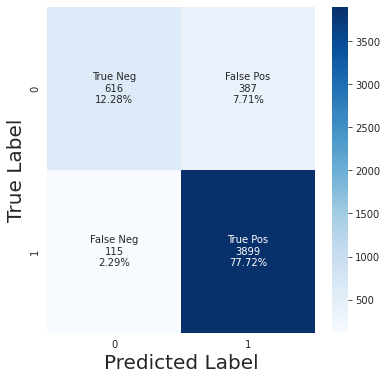

In [134]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression')

## **DecisionTreeClassifier**

In [135]:
#Decision tree
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
#Impurity
criterion = ['gini', 'entropy']
#The number of features to consider when looking for the best split
max_features = ['log2', 'sqrt', 'auto']

In [136]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_features':max_features,
    'criterion':criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt')

Classification Report
              precision    recall  f1-score   support

    Negative       0.68      0.18      0.29      1003
    Positive       0.83      0.98      0.90      4014

    accuracy                           0.82      5017
   macro avg       0.76      0.58      0.59      5017
weighted avg       0.80      0.82      0.78      5017
 

Accuracy Score
0.7153997648310674
Confusion Matrix


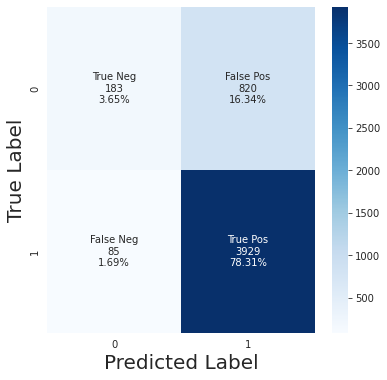

In [137]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree')

## **RandomForestClassifier**

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_features':max_features,
           'criterion':criterion,
           'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=5)

Classification Report
              precision    recall  f1-score   support

    Negative       1.00      0.02      0.04      1003
    Positive       0.80      1.00      0.89      4014

    accuracy                           0.80      5017
   macro avg       0.90      0.51      0.47      5017
weighted avg       0.84      0.80      0.72      5017
 

Accuracy Score
0.8566500299798163
Confusion Matrix


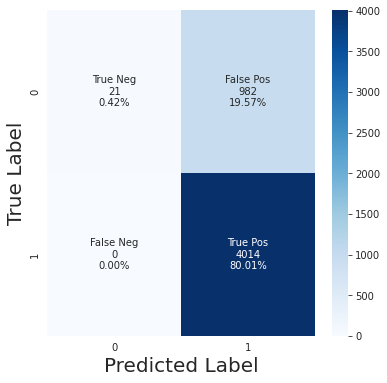

In [139]:
test_eval(clf_RF, X_test, y_test, 'Random Forest')

In [140]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb_model = GradientBoostingClassifier()

# gb_params = { 
#     "n_estimators":[1,3,5,10,15,20,30,40,50,],
#     'learning_rate': [0.1, 0.05, 0.02, 0.01],
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
# }

# clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=cv, scoring='roc_auc',n_jobs=1)

# clf_gb.fit(X_train, y_train)
# clf_gb.best_estimator_

In [141]:
#test_eval(clf_gb, X_test, y_test, 'GradientBoast')

## **XGBClassifier**

In [142]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [143]:
xgb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
clf_xgb=RandomizedSearchCV(xgb_model,xgb_params,cv=cv, scoring='roc_auc',n_jobs=1)
clf_xgb.fit(X_train, y_train)
clf_xgb.best_estimator_

[05:42:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:42:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, min_samples_leaf=2, min_samples_split=15,
              missing=nan, monotone_constraints=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

In [144]:
clf_xgb = clf_xgb.best_estimator_

Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.41      0.55      1003
    Positive       0.87      0.98      0.92      4014

    accuracy                           0.87      5017
   macro avg       0.85      0.70      0.74      5017
weighted avg       0.86      0.87      0.85      5017
 

Accuracy Score
0.8668527008172214
Confusion Matrix


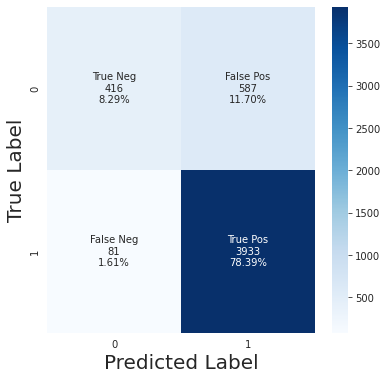

In [145]:
test_eval(clf_xgb, X_test, y_test, 'XGBClassifier')

## **MultinomialNB**

Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.05      0.09      1003
    Positive       0.81      1.00      0.89      4014

    accuracy                           0.81      5017
   macro avg       0.83      0.52      0.49      5017
weighted avg       0.82      0.81      0.73      5017
 

Accuracy Score
0.8080526210882998
Confusion Matrix


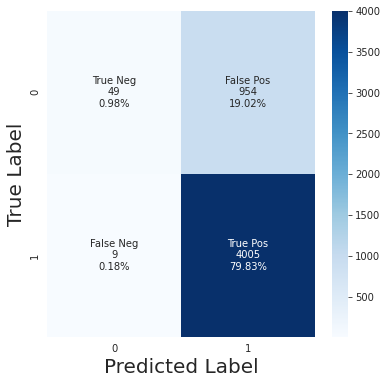

In [146]:
from sklearn.naive_bayes import MultinomialNB
clf_MB = MultinomialNB()
clf_MB.fit(X_train,y_train)
test_eval(clf_MB, X_test, y_test, 'MultinomialNB')

## **Support Vector Machine**

Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.55      0.67      1003
    Positive       0.90      0.97      0.93      4014

    accuracy                           0.89      5017
   macro avg       0.87      0.76      0.80      5017
weighted avg       0.89      0.89      0.88      5017
 

Accuracy Score
0.8891767988837951
Confusion Matrix


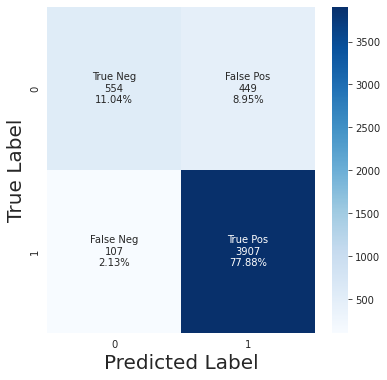

In [147]:
from sklearn.svm import SVC
clf_SVC = SVC(kernel = 'sigmoid', gamma = 1.0)
clf_SVC.fit(X_train, y_train)
test_eval(clf_SVC, X_test, y_test, 'Support Vector Machine')

## **KNeighborsClassifier**

Classification Report
              precision    recall  f1-score   support

    Negative       0.91      0.11      0.20      1003
    Positive       0.82      1.00      0.90      4014

    accuracy                           0.82      5017
   macro avg       0.86      0.55      0.55      5017
weighted avg       0.84      0.82      0.76      5017
 

Accuracy Score
0.8202112816424157
Confusion Matrix


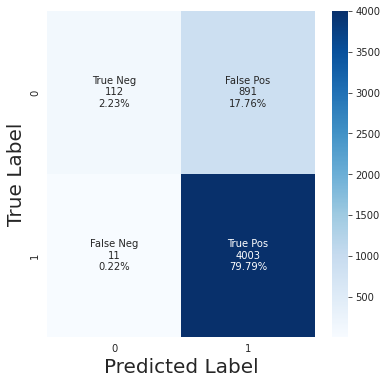

In [148]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNC = KNeighborsClassifier()
clf_KNC.fit(X_train, y_train)
test_eval(clf_KNC, X_test, y_test, 'KNeighbours')

## **ExtraTreesClassifier**

Classification Report
              precision    recall  f1-score   support

    Negative       0.89      0.49      0.63      1003
    Positive       0.89      0.99      0.93      4014

    accuracy                           0.89      5017
   macro avg       0.89      0.74      0.78      5017
weighted avg       0.89      0.89      0.87      5017
 

Accuracy Score
0.8863862866254734
Confusion Matrix


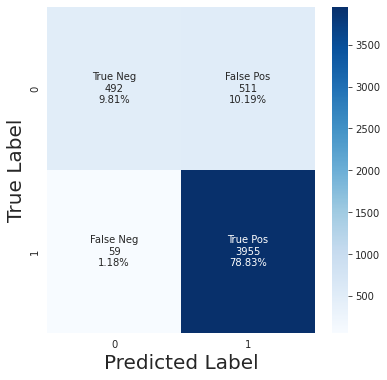

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
clf_ETC = ExtraTreesClassifier()
clf_ETC.fit(X_train, y_train)
test_eval(clf_ETC, X_test, y_test, 'ExtraTreesClassifier')

## **SGDClassifier**

In [150]:
from sklearn.linear_model import SGDClassifier
sgd_params = {
    "loss" : [ "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

sgd_model = SGDClassifier()
clf_sgd=RandomizedSearchCV(sgd_model,sgd_params,cv=cv, scoring='roc_auc',n_jobs=1)

clf_sgd.fit(X_train, y_train)
clf_sgd.best_estimator_


SGDClassifier(loss='log')

Classification Report
              precision    recall  f1-score   support

    Negative       0.87      0.40      0.55      1003
    Positive       0.87      0.99      0.92      4014

    accuracy                           0.87      5017
   macro avg       0.87      0.69      0.74      5017
weighted avg       0.87      0.87      0.85      5017
 

Accuracy Score
0.9157573368583836
Confusion Matrix


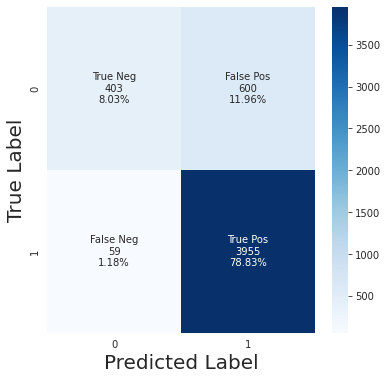

In [151]:
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier')

In [152]:
clf_eval_df = pd.DataFrame({'Model':model,
                            'Accuracy':Accuracy,
                            'Precision':precision,
                            'Recall':recall,
                            'F1-score':F1score,
                            })

In [153]:
clf_eval_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.929852,0.909706,0.971350,0.939518
1,Decision Tree,0.715400,0.827332,0.978824,0.896725
2,Random Forest,0.856650,0.803443,1.000000,0.891010
3,XGBClassifier,0.866853,0.870133,0.979821,0.921725
4,MultinomialNB,0.808053,0.807623,0.997758,0.892678
5,Support Vector Machine,0.889177,0.896924,0.973343,0.933572
6,KNeighbours,0.820211,0.817940,0.997260,0.898743
7,ExtraTreesClassifier,0.886386,0.885580,0.985301,0.932783
8,SGDClassifier,0.915757,0.868277,0.985301,0.923095


Above dataframe shows the experimental result from the models, and now it's high time to choose and select the best model while saving it. Let's save the SVC model and the vectorizer.

In [154]:
stop_words = stopwords.words('english')

In [155]:
import pickle
pickle.dump(clf_SVC,open('/content/drive/MyDrive/Assignment/svc_model.pkl', 'wb'))

In [156]:
pickle.dump(Vector,open('/content/drive/MyDrive/Assignment/vectorizer.pkl', 'wb'))

In [157]:
pickle.dump(stop_words,open('/content/drive/MyDrive/Assignment/stopwords.pkl', 'wb'))

In [158]:
pickle.dump(ps,open('/content/drive/MyDrive/Assignment/stem.pkl', 'wb'))

In [159]:
# load the model from disk
model = pickle.load(open('/content/drive/MyDrive/Assignment/svc_model.pkl', 'rb'))
vector = pickle.load(open('/content/drive/MyDrive/Assignment/vectorizer.pkl', 'rb'))
stop_words = pickle.load(open('/content/drive/MyDrive/Assignment/stopwords.pkl', 'rb'))
ps = pickle.load(open('/content/drive/MyDrive/Assignment/stem.pkl', 'rb'))

In [160]:
# making cleaning function
def find_the (text):
    while len(re.findall('##' , text)) != 0:
        text = re.sub('##' , '#' ,text)
    while len(re.findall('@@' , text)) != 0:
        text = re.sub('@@' , '@' ,text)

    no_h = len(re.findall('#',text))
    #make sure the @ is changed for at
    no_a = len(re.findall('@',text))
    
    text = re.sub('@(\s|\.|\?|,|;|:|!|\(|\))', 'at' , text)
    text = re.sub('\s' , ' ' , text)
    text = re.sub('\S@' , ' @' , text)
    text = re.sub('\S#' , ' #' , text)

    #while len(re.findall('\s\s' , text)) != 0:
    #    text = re.sub('\s\s' , '\s' ,text)

    #none_repeat = text
    text_a = text.split()         
    return text

def removing_url(text):
#replace URL of a text
    cltext = re.sub('http[^\s]+','',text)
    return cltext

def text_processing(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()    
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    return review


In [161]:
def text_cleaning(text):
  text = find_the(text)
  text = removing_url(text)
  text = text_processing(text)

  return text

In [162]:
x = df['message'][30]
x

'Can’t stand her never will I buy anything of hers'

In [163]:
y = text_cleaning(x)

In [164]:
text = vector.transform([y])

In [165]:
class_labels = {0:'Negative',
                1: 'Positive'}

In [166]:
pred = model.predict(text)
class_labels[pred[0]]

'Positive'